# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


# **Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**


In [14]:
!curl -o dataset.csv https://raw.githubusercontent.com/alfan-irsyadi/TugasOrbit/main/DataSains/TugasMBA/Market_Basket_Optimisation.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  295k  100  295k    0     0   790k      0 --:--:-- --:--:-- --:--:--  790k


In [15]:
df = pd.read_csv('dataset.csv', header=None)
print(df.head())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 21293 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong 

In [16]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB
None


Terdapat nilai yang "NA" sehingga kita harus merubah nilai tersebut menjadi 0

In [17]:
## Data Cleaning step

# replacing empty value with 0.
df.fillna(0,inplace=True)

In [18]:
print(df.head(10))

                  0             1           2                 3   \
0             shrimp       almonds     avocado    vegetables mix   
1            burgers     meatballs        eggs                 0   
2            chutney             0           0                 0   
3             turkey       avocado           0                 0   
4      mineral water          milk  energy bar  whole wheat rice   
5     low fat yogurt             0           0                 0   
6  whole wheat pasta  french fries           0                 0   
7               soup   light cream     shallot                 0   
8  frozen vegetables     spaghetti   green tea                 0   
9       french fries             0           0                 0   

             4                 5     6               7             8   \
0  green grapes  whole weat flour  yams  cottage cheese  energy drink   
1             0                 0     0               0             0   
2             0                 

## 4. Visualisasi

In [19]:
items = []
transactions=[]
for i in range(len(df)):
  x_ = []
  for j in range(df.shape[1]):
    x = df.iloc[i,j]
    
    if(x != 0):
      x_.append(x)
      if x not in items:items.append(x)
  transactions.append(x_)
      

In [20]:
print(transactions[1]) ## lihat transaksi kedua

['burgers', 'meatballs', 'eggs']


In [21]:
# Menghitung jumlah transaksi per item

freq = []
for i in items: freq.append(df[df==i].count().sum())
item_count = pd.DataFrame({'Nama Item':items, "Jumlah":freq})
most_sold = item_count.sort_values(by='Jumlah', ascending=False).head(20)
print(most_sold)

            Nama Item  Jumlah
14      mineral water    1788
22               eggs    1348
34          spaghetti    1306
29       french fries    1282
39          chocolate    1230
11          green tea     991
25               milk     972
61        ground beef     737
33  frozen vegetables     715
55           pancakes     713
20            burgers     654
69               cake     608
36            cookies     603
62           escalope     595
10     low fat yogurt     574
0              shrimp     536
43           tomatoes     513
19          olive oil     494
17    frozen smoothie     475
24             turkey     469


terlihat bahwa Mineral Water paling sering dibeli dengan jumlah 1788 transaksi diikuti dengan 'eggs' dengan jumlah 1348 transaksi

In [22]:
def to_persen(x): return x*100/(item_count['Jumlah'].sum())
print(item_count['Jumlah'].apply(to_persen))

0      1.825427
1      0.521064
2      0.851412
3      0.657290
4      0.231584
         ...   
115    0.149848
116    0.112386
117    0.003406
118    0.023840
119    0.017028
Name: Jumlah, Length: 120, dtype: float64


persentase untuk nilai tertinggi sekitar 1.82%

<Figure size 1440x432 with 0 Axes>

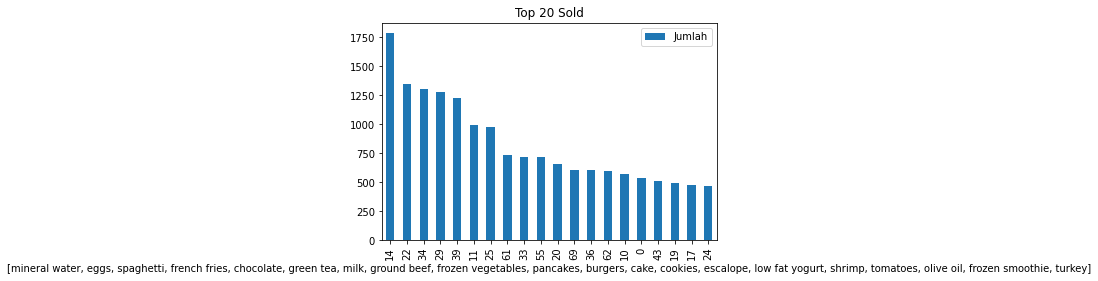

None

In [23]:
plt.figure(figsize=(20,6))

most_sold.plot(kind='bar', xlabel=most_sold['Nama Item'])
plt.title('Top 20 Sold')
display(plt.show())

## 5. Market Basket Analysis

In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [25]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)

dfku = metrix[['antecedents','consequents', 'support', 'confidence', 'lift']]

In [26]:
print(dfku.sort_values('lift', ascending=False).head(3))
# metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

         antecedents                 consequents   support  confidence  \
214  (herb & pepper)               (ground beef)  0.015998    0.323450   
215    (ground beef)             (herb & pepper)  0.015998    0.162822   
385    (ground beef)  (mineral water, spaghetti)  0.017064    0.173677   

         lift  
214  3.291994  
215  3.291994  
385  2.907928  


Terlihat bahwa kebanyakan pelanggan membeli "Herb & Pepper" lalu membeli "ground beef"

In [27]:
dfku.sort_values('confidence', ascending=False).head(3)

,antecedents,consequents,support,confidence,lift
343,"(eggs, ground beef)",(mineral water),0.010132,0.506667,2.125563
376,"(milk, ground beef)",(mineral water),0.011065,0.503030,2.110308
319,"(chocolate, ground beef)",(mineral water),0.010932,0.473988,1.988472


In [28]:
dfku.sort_values('support', ascending=False).head(3)

,antecedents,consequents,support,confidence,lift
274,(mineral water),(spaghetti),0.059725,0.250559,1.439085
275,(spaghetti),(mineral water),0.059725,0.343032,1.439085
84,(chocolate),(mineral water),0.052660,0.321400,1.348332


# **Kesimpulan**

Dapat dilihat dari analisis diatas, di mana semakin tinggi nilai peningkatan, semakin kuat korelasi antar item.
(format: antecedant(s) -> consequent):


> (Herb + pepper) -> ground beef

> ground beef -> (herb + pepper)

> ground beef -> (spagehetti + mineral water)


Bisnis selalu mencari cara untuk mengoptimalkan pengaturan mereka dan meningkatkan penjualan mereka. Toko roti tidak berbeda, dan analisis semacam ini bisa dilakukan untuk semua jenis toko ritel atau pasar juga. Karena kita sekarang mengetahui korelasi antara item dan kepentingan bersama pelanggan, bisnis dapat membuat keputusan berdasarkan temuan ini. Misalnya, Pasar ini meletakkan herb dan pepper disebelah ground beef

In [32]:
!jupyter nbconvert --to pdf "Persevere29_M Alfan Irsyadi HTG_Market Basket Analysis.ipynb"

[NbConvertApp] Converting notebook Persevere29_M Alfan Irsyadi HTG_Market Basket Analysis.ipynb to pdf
[NbConvertApp] Support files will be in Persevere29_M Alfan Irsyadi HTG_Market Basket Analysis_files/
[NbConvertApp] Making directory ./Persevere29_M Alfan Irsyadi HTG_Market Basket Analysis_files
[NbConvertApp] Writing 66936 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 80656 bytes to Persevere29_M Alfan Irsyadi HTG_Market Basket Analysis.pdf
